In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("healthcare-dataset-stroke-data4.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.4,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.902094,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699185,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [8]:
for i in list(data.columns):
    print("{} -- {}".format(i,data[i].value_counts().shape[0]))

id -- 5110
gender -- 3
age -- 104
hypertension -- 2
heart_disease -- 2
ever_married -- 2
work_type -- 5
Residence_type -- 2
avg_glucose_level -- 3979
bmi -- 418
smoking_status -- 4
stroke -- 2


In [9]:
kategorik=["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
data_kat=data.loc[:,kategorik]
data_kat

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked,0
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5108,Male,0,0,Yes,Private,Rural,formerly smoked,0


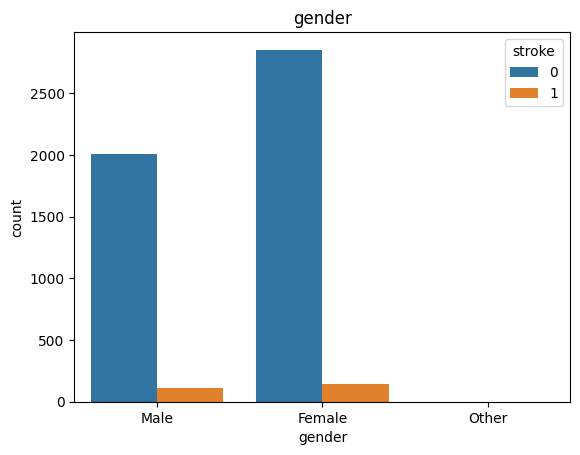

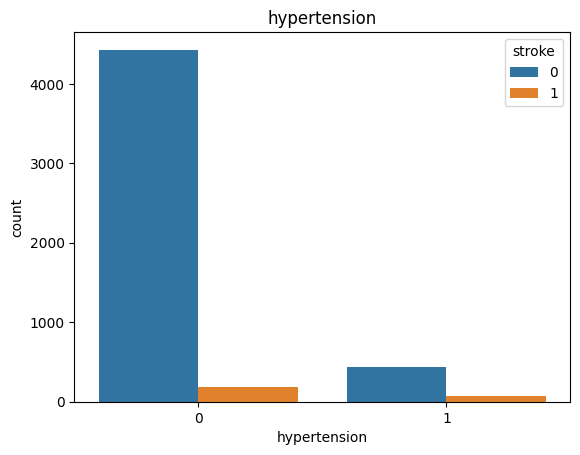

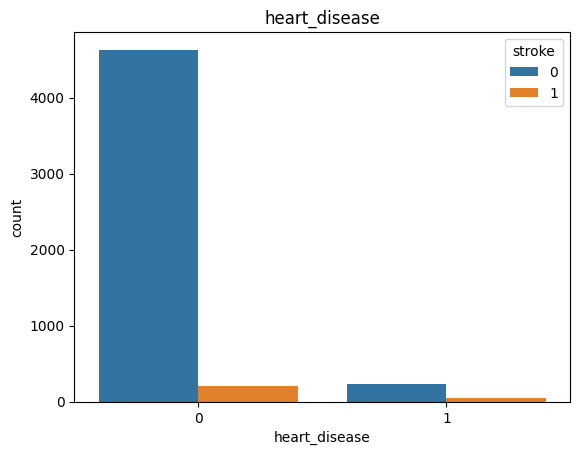

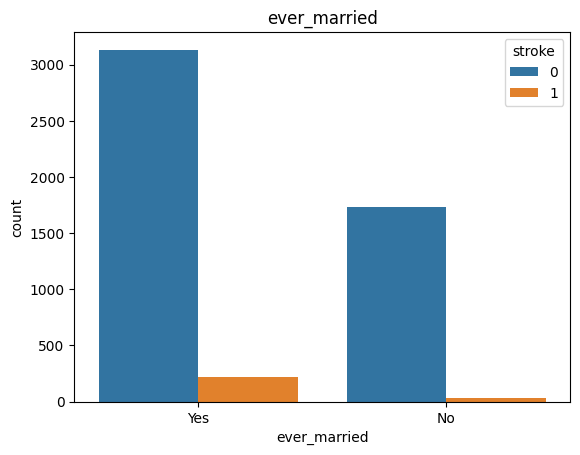

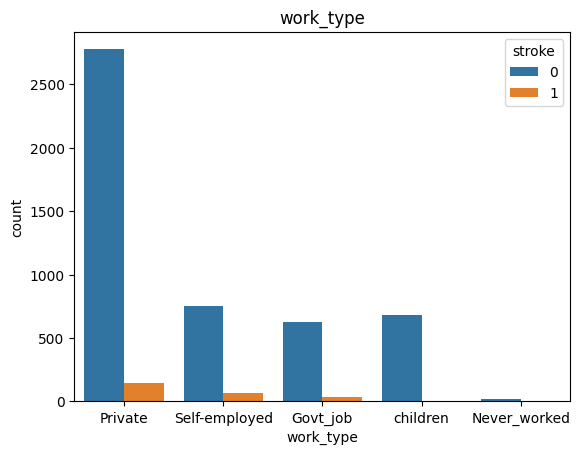

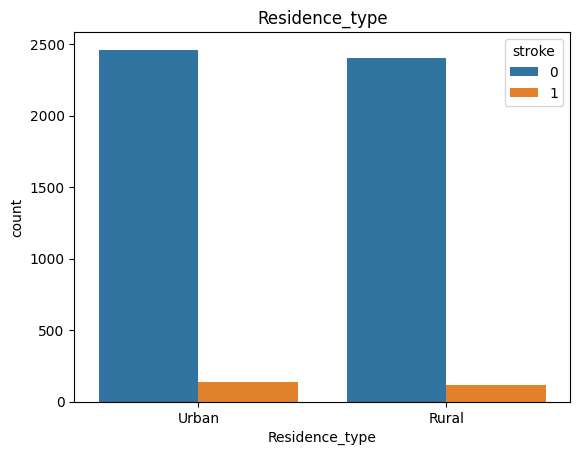

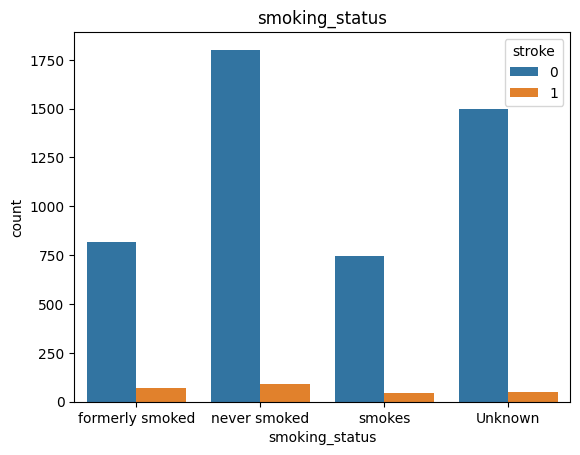

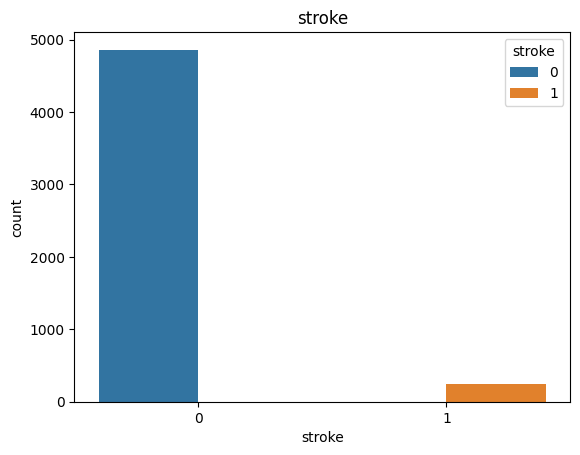

In [10]:
for i in data_kat:
    plt.figure()
    sns.countplot(x=i,data=data_kat,hue="stroke")
    plt.title(i)

In [11]:
sayisal=["id","age","avg_glucose_level","bmi","stroke"]
data_sayisal=data.loc[:,sayisal]
data_sayisal.head()

,id,age,avg_glucose_level,bmi,stroke
0,9046,67.0,228.69,36.6,1
1,51676,61.0,202.21,30.4,1
2,31112,80.0,105.92,32.5,1
3,60182,49.0,171.23,34.4,1
4,1665,79.0,174.12,24.0,1


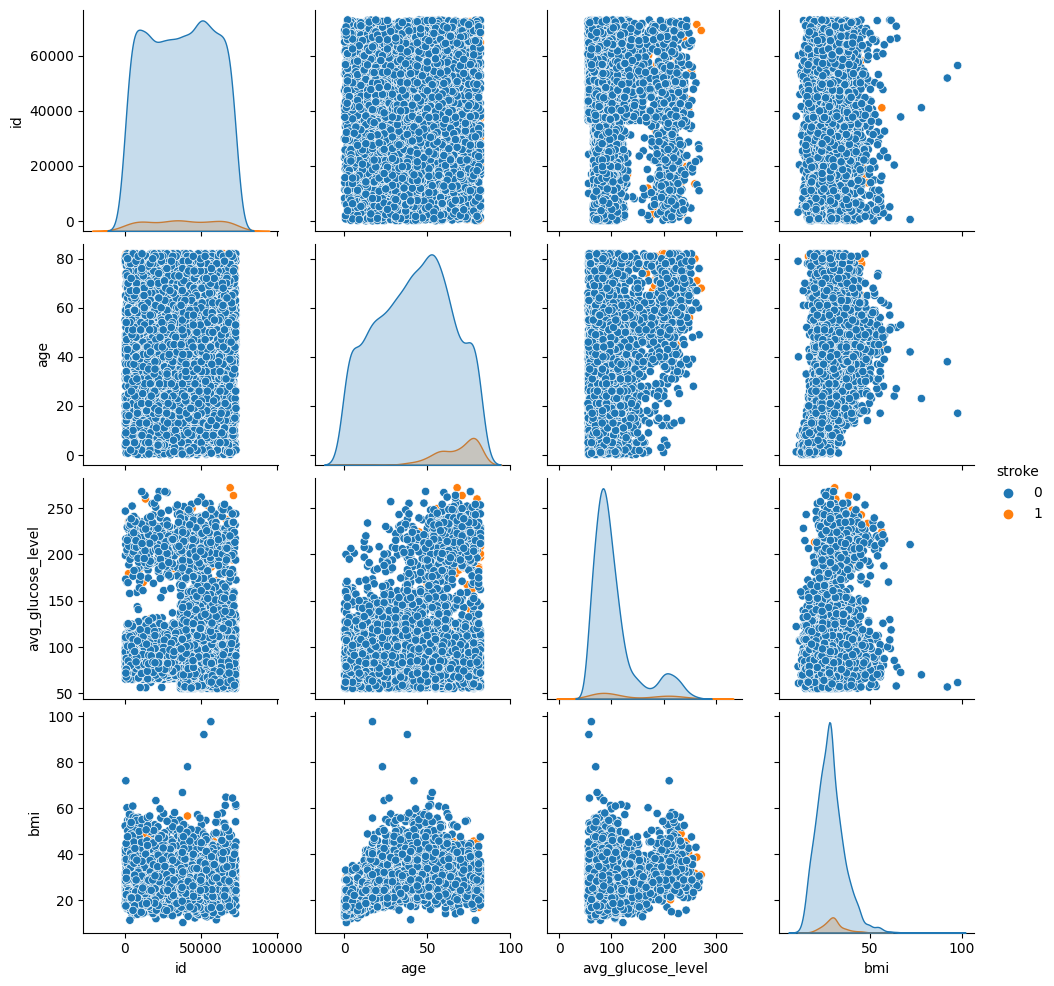

In [12]:
sns.pairplot(data_sayisal,hue="stroke",diag_kind="kde")
plt.show()

In [13]:
scaler=StandardScaler()
scaled_array=scaler.fit_transform(data[sayisal[:-1]])
scaled_array
#noktanın konumunu outputu devre dışı bırakarak(-1 ile) bir array'e atamış olduk.

array([[-1.29831203,  1.05143428,  2.70637544,  0.99993174],
       [ 0.71637149,  0.78607007,  2.12155854,  0.19457289],
       [-0.25547819,  1.62639008, -0.0050283 ,  0.46735572],
       ...,
       [-0.79371959, -0.36384151, -0.51144264,  0.22055221],
       [ 0.04849658,  0.34379639,  1.32825706, -0.42893074],
       [ 0.38569496,  0.03420481, -0.46086746, -0.35099278]])

In [14]:
data1=data.copy()
data1
#yedekleme işlemi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.4,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.8,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
data.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.8,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [16]:
data1=pd.get_dummies(data1,columns=kategorik[:-1],drop_first=True)
data1.head()
#her kategorideki değer için var ya da yok diye belirleme işlemi

,id,age,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.6,1,1,0,0,1,1,0,1,0,0,1,1,0,0
1,51676,61.0,202.21,30.4,1,0,0,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.5,1,1,0,0,1,1,0,1,0,0,0,0,1,0
3,60182,49.0,171.23,34.4,1,0,0,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,174.12,24.0,1,0,0,1,0,1,0,0,1,0,0,0,1,0


In [17]:
x=data1.drop(["stroke"],axis=1)
y=data1[["stroke"]]
x
#bağımlı ve bağımsız değişkenlerimizi oluşturuyoruz.

,id,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.6,1,0,0,1,1,0,1,0,0,1,1,0,0
1,51676,61.0,202.21,30.4,0,0,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.5,1,0,0,1,1,0,1,0,0,0,0,1,0
3,60182,49.0,171.23,34.4,0,0,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,174.12,24.0,0,0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,28.8,0,0,1,0,1,0,1,0,0,1,0,1,0
5106,44873,81.0,125.20,40.0,0,0,0,0,1,0,0,1,0,1,0,1,0
5107,19723,35.0,82.99,30.6,0,0,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,166.29,25.6,1,0,0,0,1,0,1,0,0,0,1,0,0


In [18]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [19]:
scaler=StandardScaler()
x[sayisal[:-1]]=scaler.fit_transform(x[sayisal[:-1]])
x
#sadece sayısal işlemler üzerinde scale işlemi yaptık
#sayısal değerlerin x ve y değişkenlerinin noktaların konumlarına göre sıfır ve bir değerlerinin belirlenmesi

,id,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-1.298312,1.051434,2.706375,0.999932,1,0,0,1,1,0,1,0,0,1,1,0,0
1,0.716371,0.786070,2.121559,0.194573,0,0,0,0,1,0,0,1,0,0,0,1,0
2,-0.255478,1.626390,-0.005028,0.467356,1,0,0,1,1,0,1,0,0,0,0,1,0
3,1.118363,0.255342,1.437358,0.714159,0,0,0,0,1,0,1,0,0,1,0,0,1
4,-1.647136,1.582163,1.501184,-0.636765,0,0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.864089,1.626390,-0.494658,-0.013262,0,0,1,0,1,0,1,0,0,1,0,1,0
5106,0.394863,1.670617,0.420775,1.441580,0,0,0,0,1,0,0,1,0,1,0,1,0
5107,-0.793720,-0.363842,-0.511443,0.220552,0,0,0,0,1,0,0,1,0,0,0,1,0
5108,0.048497,0.343796,1.328257,-0.428931,1,0,0,0,1,0,1,0,0,0,1,0,0


In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.429,random_state=5)

In [21]:
logreg=LogisticRegression()
#nesne ürettik

In [22]:
logreg.fit(xtrain,ytrain)

c:\Users\Mahmut Sevimli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [23]:
ypred_prob=logreg.predict_proba(xtest)
ypred_prob
#olasılık sonucu verir

array([[0.94489019, 0.05510981],
       [0.9463694 , 0.0536306 ],
       [0.96460441, 0.03539559],
       ...,
       [0.98218125, 0.01781875],
       [0.99512082, 0.00487918],
       [0.95042859, 0.04957141]])

In [24]:
xtest


,id,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1302,0.924976,0.962980,1.350784,-0.234086,0,0,0,0,1,0,0,1,0,0,0,1,0
3631,0.490801,0.830297,-1.091180,-0.000272,0,0,0,0,1,0,1,0,0,1,0,1,0
4862,0.611219,0.432251,-0.491124,0.999932,0,0,0,0,1,0,1,0,0,0,0,0,0
3549,1.643655,1.626390,0.436014,-0.000272,0,0,1,0,1,0,1,0,0,1,0,0,1
3607,0.996244,0.918752,-0.611710,-0.247076,0,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,-0.607705,-1.690663,-0.668910,-1.156352,0,0,0,0,0,0,0,0,1,1,0,0,0
2334,-0.900385,1.316798,-0.586532,0.324469,1,0,0,0,0,0,0,0,0,0,0,0,1
4893,0.203603,-0.054250,-0.946963,-0.247076,0,0,0,0,0,0,1,0,0,1,0,1,0
345,-1.277470,-0.894570,-0.137540,-0.402951,0,0,0,0,0,0,1,0,0,1,0,1,0


In [25]:
ypred=np.argmax(ypred_prob,axis=1)
ypred
#belli bir eşiğin altındaysa sıfır üstündeyse 1 değerini verir

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
dummy=pd.DataFrame(ypred_prob)
dummy["pred"]=ypred
dummy.head()

,0,1,pred
0,0.944890,0.055110,0
1,0.946369,0.053631,0
2,0.964604,0.035396,0
3,0.632581,0.367419,0
4,0.930459,0.069541,0


In [27]:
print("Test Accuracy",accuracy_score(ypred,ytest))

Test Accuracy 0.9521203830369357
